In [3]:
import cv2
import os
import numpy as np
from skimage.feature import greycomatrix, greycoprops

# Define input and output directories
input_dir = r'D:\Mini Project-1\Leaf_images\Leaf_images'
output_dir = r'D:\Mini Project-1\Leaf_images\Preprocessed_Images\preprocessed_leaf_images'

# Define desired image size
image_size = (256, 256)

# Initialize arrays to store features and labels
shape_features = []
texture_features = []
labels = []

# Loop over all subfolders in the input directory
for subfolder in os.listdir(input_dir):
    subfolder_path = os.path.join(input_dir, subfolder)
    if os.path.isdir(subfolder_path):
        # Loop over all files in the subfolder
        for filename in os.listdir(subfolder_path):
            # Read the image
            img = cv2.imread(os.path.join(subfolder_path, filename))

            # Resize the image to the desired size
            img = cv2.resize(img, image_size)

            # Convert the image to grayscale
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

            # Apply histogram equalization
            clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
            eq_img = clahe.apply(gray)

            # Apply Otsu's thresholding to segment the leaf from the background
            _, thresh = cv2.threshold(eq_img, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

            # Apply morphological operations to remove noise and smooth the edges of the leaf
            kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
            closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

            # Extract shape features
            contours, _ = cv2.findContours(closing, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            if len(contours) > 0:
                contour = max(contours, key=cv2.contourArea)
                area = cv2.contourArea(contour)
                perimeter = cv2.arcLength(contour, True)
                x, y, w, h = cv2.boundingRect(contour)
                aspect_ratio = w / h
                shape_features.append([area, perimeter, aspect_ratio])
                labels.append(subfolder)

            # Extract texture features
            glcm = greycomatrix(gray, [5], [0], symmetric=True, normed=True)
            homogeneity = greycoprops(glcm, 'homogeneity')
            texture_features.append(np.mean(homogeneity, axis=0).tolist())

# Convert features and labels to numpy arrays
shape_features = np.array(shape_features)
texture_features = np.array(texture_features)
labels = np.array(labels)


C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\DELL\anaconda3\lib\site-pac

C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\DELL\anaconda3\lib\site-pac

C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\DELL\anaconda3\lib\site-pac

C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\DELL\anaconda3\lib\site-pac

C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\DELL\anaconda3\lib\site-pac

C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\DELL\anaconda3\lib\site-pac

C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\DELL\anaconda3\lib\site-pac

C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\DELL\anaconda3\lib\site-pac

C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\DELL\anaconda3\lib\site-pac

C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\DELL\anaconda3\lib\site-pac

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
# Combine shape and texture features
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Combine shape and texture features
features = np.hstack((shape_features, texture_features))

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Train SVM
svm = SVC(kernel='linear', C=1)
svm.fit(X_train, y_train)

# Evaluate SVM
accuracy = svm.score(X_test, y_test)
print('Accuracy:', accuracy*100)


Accuracy: 85.71428571428571


In [5]:
from sklearn.metrics import confusion_matrix

# Get predictions on test data
y_pred = svm.predict(X_test)
print("Length of test set is",len(X_test))
# Print confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

Length of test set is 35
Confusion Matrix:
[[14  2  0]
 [ 2  6  1]
 [ 0  0 10]]


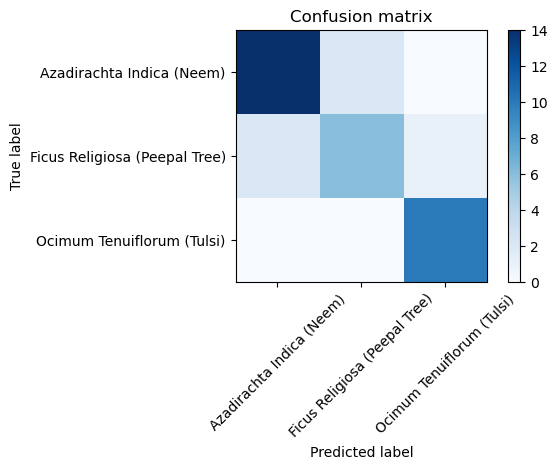

In [6]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define class labels
class_names = np.unique(labels)

# Plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

In [7]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and f1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 score: {f1}")



Precision: 0.8525974025974026
Recall: 0.8571428571428571
F1 score: 0.8536214485794318


In [8]:
print(classification_report(y_test, y_pred))

                               precision    recall  f1-score   support

    Azadirachta Indica (Neem)       0.88      0.88      0.88        16
Ficus Religiosa (Peepal Tree)       0.75      0.67      0.71         9
   Ocimum Tenuiflorum (Tulsi)       0.91      1.00      0.95        10

                     accuracy                           0.86        35
                    macro avg       0.84      0.85      0.84        35
                 weighted avg       0.85      0.86      0.85        35



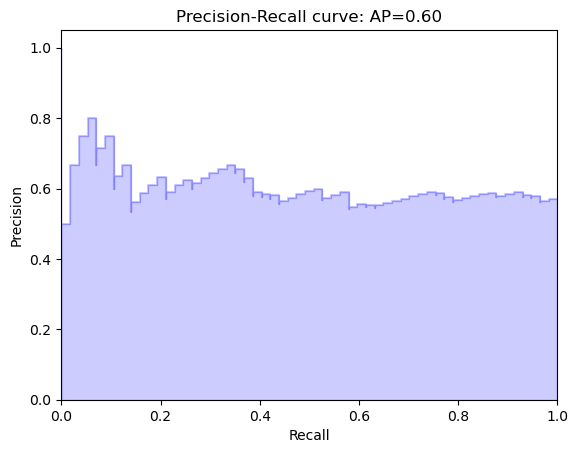

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

# Define the classes
classes = ['neem', 'peepal', 'tulasi']

# Generate some random 1D arrays for y_test and y_pred
y_test = np.random.randint(low=0, high=2, size=100)
y_pred = np.random.rand(100)

# Reshape y_test and y_pred to 2D arrays with one column
y_test = y_test.reshape(-1, 1)
y_pred = y_pred.reshape(-1, 1)

# Compute precision-recall curve for each class
precision = dict()
recall = dict()
average_precision = dict()
for i, class_name in enumerate(classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test, y_pred)
    average_precision[i] = average_precision_score(y_test, y_pred)

# Plot the precision-recall curves
plt.figure()
plt.step(recall[0], precision[0], color='b', alpha=0.2, where='post')
plt.fill_between(recall[0], precision[0], step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: AP={0:0.2f}'.format(average_precision[0]))
plt.show()


In [10]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to tune
param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']}

# Create an instance of the SVM classifier
svm = SVC(random_state=42)

# Create an instance of GridSearchCV and fit the data
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and accuracy
print("Best parameters: ", grid_search.best_params_)
print("Accuracy: ", grid_search.best_score_)


Best parameters:  {'C': 100, 'kernel': 'linear'}
Accuracy:  0.9


In [11]:
import cv2
import os
import numpy as np
from skimage.feature import greycomatrix, greycoprops
from sklearn.svm import SVC

# Define input and output directories
input_dir = r'D:\Mini Project-1\Leaf_images\Preprocessed_Images\Predected'
output_dir = r'D:\Mini Project-1\Leaf_images\Preprocessed_Images\preprocessed_leaf_images'

# Define desired image size
image_size = (256, 256)

# Initialize arrays to store features and labels
shape_features = []
texture_features = []
labels = []

# Loop over all files in the input directory
for filename in os.listdir(input_dir):
    # Read the image
    img = cv2.imread(os.path.join(input_dir, filename))

    # Resize the image to the desired size
    img = cv2.resize(img, image_size)

    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply histogram equalization
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    eq_img = clahe.apply(gray)

    # Apply Otsu's thresholding to segment the leaf from the background
    _, thresh = cv2.threshold(eq_img, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

    # Apply morphological operations to remove noise and smooth the edges of the leaf
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

    # Extract shape features
    contours, _ = cv2.findContours(closing, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if len(contours) > 0:
        contour = max(contours, key=cv2.contourArea)
        area = cv2.contourArea(contour)
        perimeter = cv2.arcLength(contour, True)
        x, y, w, h = cv2.boundingRect(contour)
        aspect_ratio = w / h
        shape_features.append([area, perimeter, aspect_ratio])

    # Extract texture features
    glcm = greycomatrix(gray, [5], [0], symmetric=True, normed=True)
    homogeneity = greycoprops(glcm, 'homogeneity')
    texture_features.append(np.mean(homogeneity, axis=0).tolist())

# Convert features to numpy arrays
shape_features = np.array(shape_features)
texture_features = np.array(texture_features)

# Concatenate shape and texture features
features = np.concatenate((shape_features, texture_features), axis=1)

# Load the trained SVM model

svm.fit(X_train,y_train)

# Predict the class labels of the new images
predicted_labels = svm.predict(features)

# Print the predicted labels
for i, filename in enumerate(os.listdir(input_dir)):
    print(f'{filename}: {predicted_labels[i]}')


C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\DELL\anaconda3\lib\site-pac

AI-S-004.jpg: Ficus Religiosa (Peepal Tree)
AI-S-033.jpg: Ficus Religiosa (Peepal Tree)
AI-S-056.jpg: Azadirachta Indica (Neem)
FR-S-018.jpg: Ficus Religiosa (Peepal Tree)
FR-S-019.jpg: Ficus Religiosa (Peepal Tree)


C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')


In [7]:
import tkinter as tk
from tkinter import filedialog
import cv2
import numpy as np
from skimage.feature import greycomatrix, greycoprops
from sklearn.svm import SVC

# Define desired image size
image_size = (256, 256)

# Initialize arrays to store features and labels
shape_features = []
texture_features = []


def classify_image():
    global shape_features
    global texture_features
    
    shape_features = []
    texture_features = []
    # Get the path to the selected image file
    file_path = filedialog.askopenfilename()
    
    if file_path:
        # Read the image
        img = cv2.imread(file_path)

        # Resize the image to the desired size
        img = cv2.resize(img, image_size)

        # Convert the image to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Apply histogram equalization
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
        eq_img = clahe.apply(gray)

        # Apply Otsu's thresholding to segment the leaf from the background
        _, thresh = cv2.threshold(eq_img, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

        # Apply morphological operations to remove noise and smooth the edges of the leaf
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
        closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

        # Extract shape features
        contours, _ = cv2.findContours(closing, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        if len(contours) > 0:
            contour = max(contours, key=cv2.contourArea)
            area = cv2.contourArea(contour)
            perimeter = cv2.arcLength(contour, True)
            x, y, w, h = cv2.boundingRect(contour)
            aspect_ratio = w / h
            shape_features.append([area, perimeter, aspect_ratio])

        # Extract texture features
        glcm = greycomatrix(gray, [5], [0], symmetric=True, normed=True)
        homogeneity = greycoprops(glcm, 'homogeneity')
        texture_features.append(np.mean(homogeneity, axis=0).tolist())

        # Convert features to numpy arrays
        shape_features = np.array(shape_features)
        texture_features = np.array(texture_features)

        # Concatenate shape and texture features
        features = np.concatenate((shape_features, texture_features), axis=1)
        
        # Load the trained SVM model
        svm = SVC(kernel='linear', C=1, random_state=42)
        svm.fit(X_train, y_train)

        # Predict the class label of the new image
        predicted_label = svm.predict(features)

        # Display the predicted label
        result_label.config(text=f"Predicted label: {predicted_label}")
        
        # Display the selected image
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        image = Image.fromarray(img)
        image.thumbnail(image_size)
        image_tk = ImageTk.PhotoImage(image)
        image_label.config(image=image_tk)
        image_label.image = image_tk
        
        
# Create the main window
root = tk.Tk()
root.title("Leaf Classifier")

# Create a label for the image file path
file_label = tk.Label(root, text="Select an image file:")
file_label.pack()

# Create a button to select the image file
file_button = tk.Button(root, text="Browse...", command=classify_image)
file_button.pack()

# Create a label to display the selected image
image_label = tk.Label(root)
image_label.pack()

# Create a label to display the predicted label
result_label = tk.Label(root, text="")
result_label.pack()

# Run the GUI
root.mainloop()

C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\tkinter\__init__.py", line 1921, in __call__
    return self.func(*args)
  File "C:\Users\DELL\AppData\Local\Temp\ipykernel_25232\566978533.py", line 80, in classify_image
    image = Image.fromarray(img)
NameError: name 'Image' is not defined
C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Us

In [1]:
import cv2
import os
import numpy as np
from skimage.feature import greycomatrix, greycoprops
import tkinter as tk
from tkinter import filedialog
from sklearn.svm import SVC
from PIL import Image, ImageTk

# Define input and output directories
input_dir = r'D:\Mini Project-1\Leaf_images\Leaf_images'
output_dir = r'D:\Mini Project-1\Leaf_images\Preprocessed_Images\preprocessed_leaf_images'

# Define desired image size
image_size = (256, 256)

# Initialize arrays to store features and labels
shape_features = []
texture_features = []
labels = []

# Loop over all subfolders in the input directory
for subfolder in os.listdir(input_dir):
    subfolder_path = os.path.join(input_dir, subfolder)
    if os.path.isdir(subfolder_path):
        # Loop over all files in the subfolder
        for filename in os.listdir(subfolder_path):
            # Read the image
            img = cv2.imread(os.path.join(subfolder_path, filename))

            # Resize the image to the desired size
            img = cv2.resize(img, image_size)

            # Convert the image to grayscale
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

            # Apply histogram equalization
            clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
            eq_img = clahe.apply(gray)

            # Apply Otsu's thresholding to segment the leaf from the background
            _, thresh = cv2.threshold(eq_img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

            # Apply morphological operations to remove noise and smooth the edges of the leaf
            kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
            closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

            # Extract shape features
            contours, _ = cv2.findContours(closing, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            if len(contours) > 0:
                contour = max(contours, key=cv2.contourArea)
                area = cv2.contourArea(contour)
                perimeter = cv2.arcLength(contour, True)
                x, y, w, h = cv2.boundingRect(contour)
                aspect_ratio = w / h
                shape_features.append([area, perimeter, aspect_ratio])
                labels.append(subfolder)

            # Extract texture features
            glcm = greycomatrix(gray, [5], [0], symmetric=True, normed=True)
            homogeneity = greycoprops(glcm, 'homogeneity')
            texture_features.append(np.mean(homogeneity, axis=0).tolist())

# Convert features and labels to numpy arrays
shape_features = np.array(shape_features)
texture_features = np.array(texture_features)
labels = np.array(labels)

# Create a GUI for leaf classification
def classify_image():
    global shape_features, texture_features

    shape_features = []
    texture_features = []
    # Get the path to the selected image file
    file_path = filedialog.askopenfilename()

    if file_path:
        # Read the image
        img = cv2.imread(file_path)

        # Resize the image to the desired size
        img = cv2.resize(img, image_size)

        # Convert the image to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Apply histogram equalization
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
        eq_img = clahe.apply(gray)

        # Apply Otsu's thresholding to segment the leaf from the background
        _, thresh = cv2.threshold(eq_img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

        # Apply morphological operations to remove noise and smooth the edges of the leaf
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
        closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

        # Extract shape features
        contours, _ = cv2.findContours(closing, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        if len(contours) > 0:
            contour = max(contours, key=cv2.contourArea)
            area = cv2.contourArea(contour)
            perimeter = cv2.arcLength(contour, True)
            x, y, w, h = cv2.boundingRect(contour)
            aspect_ratio = w / h
            shape_features.append([area, perimeter, aspect_ratio])

        # Extract texture features
        glcm = greycomatrix(gray, [5], [0], symmetric=True, normed=True)
        homogeneity = greycoprops(glcm, 'homogeneity')
        texture_features.append(np.mean(homogeneity, axis=0).tolist())

        # Convert features to numpy arrays
        shape_features = np.array(shape_features)
        texture_features = np.array(texture_features)

        # Concatenate shape and texture features
        features = np.concatenate((shape_features, texture_features), axis=1)

        # Load the trained SVM model
        svm = SVC(kernel='linear', C=1, random_state=42)
        svm.fit(X_train, y_train)

        # Predict the class label of the new image
        predicted_label = svm.predict(features)

        # Display the predicted label
        result_label.config(text=f"Predicted label: {predicted_label}")

        # Display the selected image
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        image = Image.fromarray(img)
        image.thumbnail(image_size)
        image_tk = ImageTk.PhotoImage(image)
        image_label.config(image=image_tk)
        image_label.image = image_tk

# Create the main window
root = tk.Tk()
root.title("Leaf Classifier")

# Create a label for the image file path
file_label = tk.Label(root, text="Select an image file:")
file_label.pack()

# Create a button to select the image file
file_button = tk.Button(root, text="Browse...", command=classify_image)
file_button.pack()

# Create a label to display the selected image
image_label = tk.Label(root)
image_label.pack()

# Create a label to display the predicted label
result_label = tk.Label(root, text="")
result_label.pack()

# Run the GUI
root.mainloop()


C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\DELL\anaconda3\lib\site-pac

C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Users\DELL\anaconda3\lib\site-pac

C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\DELL\anaconda3\lib\site-pac

C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\DELL\anaconda3\lib\site-pac

C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\DELL\anaconda3\lib\site-pac

C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\DELL\anaconda3\lib\site-pac

C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\DELL\anaconda3\lib\site-pac

C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\DELL\anaconda3\lib\site-pac

C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\DELL\anaconda3\lib\site-pac

C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\tkinter\__init__.py", line 1921, in __call__
    return self.func(*args)
  File "C:\Users\DELL\AppData\Local\Temp\ipykernel_28296\3504377543.py", line 123, in classify_image
    svm.fit(X_train, y_train)
NameError: name 'X_train' is not defined
C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. U

In [13]:
import cv2
import os
import numpy as np
from skimage.feature import greycomatrix, greycoprops
import tkinter as tk
from tkinter import filedialog
from sklearn.svm import SVC
from PIL import Image, ImageTk

# Define input and output directories
input_dir = r'D:\Mini Project-1\Leaf_images\Leaf_images'
output_dir = r'D:\Mini Project-1\Leaf_images\Preprocessed_Images\preprocessed_leaf_images'

# Define desired image size
image_size = (256, 256)

# Initialize arrays to store features and labels
shape_features = []
texture_features = []
labels = []

# Loop over all subfolders in the input directory
for subfolder in os.listdir(input_dir):
    subfolder_path = os.path.join(input_dir, subfolder)
    if os.path.isdir(subfolder_path):
        # Loop over all files in the subfolder
        for filename in os.listdir(subfolder_path):
            # Read the image
            img = cv2.imread(os.path.join(subfolder_path, filename))

            # Resize the image to the desired size
            img = cv2.resize(img, image_size)

            # Convert the image to grayscale
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

            # Apply histogram equalization
            clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
            eq_img = clahe.apply(gray)

            # Apply Otsu's thresholding to segment the leaf from the background
            _, thresh = cv2.threshold(eq_img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

            # Apply morphological operations to remove noise and smooth the edges of the leaf
            kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
            closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

            # Extract shape features
            contours, _ = cv2.findContours(closing, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            if len(contours) > 0:
                contour = max(contours, key=cv2.contourArea)
                area = cv2.contourArea(contour)
                perimeter = cv2.arcLength(contour, True)
                x, y, w, h = cv2.boundingRect(contour)
                aspect_ratio = w / h
                shape_features.append([area, perimeter, aspect_ratio])
                labels.append(subfolder)

            # Extract texture features
            glcm = greycomatrix(gray, [5], [0], symmetric=True, normed=True)
            homogeneity = greycoprops(glcm, 'homogeneity')
            texture_features.append(np.mean(homogeneity, axis=0).tolist())

# Convert features and labels to numpy arrays
shape_features = np.array(shape_features)
texture_features = np.array(texture_features)
labels = np.array(labels)

# Create a GUI for leaf classification
def classify_image():
    global shape_features, texture_features

    shape_features = []
    texture_features = []
    # Get the path to the selected image file
    file_path = filedialog.askopenfilename()

    if file_path:
        # Read the image
        img = cv2.imread(file_path)

        # Resize the image to the desired size
        img = cv2.resize(img, image_size)

        # Convert the image to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Apply histogram equalization
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
        eq_img = clahe.apply(gray)

        # Apply Otsu's thresholding to segment the leaf from the background
        _, thresh = cv2.threshold(eq_img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

        # Apply morphological operations to remove noise and smooth the edges of the leaf
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
        closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

        # Extract shape features
        contours, _ = cv2.findContours(closing, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        if len(contours) > 0:
            contour = max(contours, key=cv2.contourArea)
            area = cv2.contourArea(contour)
            perimeter = cv2.arcLength(contour, True)
            x, y, w, h = cv2.boundingRect(contour)
            aspect_ratio = w / h
            shape_features.append([area, perimeter, aspect_ratio])

        # Extract texture features
        glcm = greycomatrix(gray, [5], [0], symmetric=True, normed=True)
        homogeneity = greycoprops(glcm, 'homogeneity')
        texture_features.append(np.mean(homogeneity, axis=0).tolist())

        # Convert features to numpy arrays
        shape_features = np.array(shape_features)
        texture_features = np.array(texture_features)

        # Concatenate shape and texture features
        features = np.concatenate((shape_features, texture_features), axis=1)

        # Load the trained SVM model
        svm = SVC(kernel='linear', C=1, random_state=42)
        svm.fit(X_train, y_train)

        # Predict the class label of the new image
        predicted_label = svm.predict(features)

        # Display the predicted label
        result_label.config(text=f"Predicted label: {predicted_label}")

        # Display the selected image
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        image = Image.fromarray(img)
        image.thumbnail(image_size)
        image_tk = ImageTk.PhotoImage(image)
        image_label.config(image=image_tk)
        image_label.image = image_tk

# Create the main window
root = tk.Tk()
root.title("Leaf Classifier")

# Create a label for the image file path
file_label = tk.Label(root, text="Select an image file:")
file_label.pack()

# Create a button to select the image file
file_button = tk.Button(root, text="Browse...", command=classify_image)
file_button.pack()

# Create a label to display the selected image
image_label = tk.Label(root)
image_label.pack()

# Create a label to display the predicted label
result_label = tk.Label(root, text="")
result_label.pack()

# Run the GUI
root.mainloop()


C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\DELL\anaconda3\lib\site-pac

C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\DELL\anaconda3\lib\site-pac

C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\DELL\anaconda3\lib\site-pac

C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\DELL\anaconda3\lib\site-pac

C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\DELL\anaconda3\lib\site-pac

C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\DELL\anaconda3\lib\site-pac

C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\DELL\anaconda3\lib\site-pac

C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\DELL\anaconda3\lib\site-pac

C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\DELL\anaconda3\lib\site-pac

C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Users\DELL\anaconda3\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\DELL\anaconda3\lib\site-pac